This notebook is a basic example of the usage of the new version of the Agalia neural network.

In [1]:
import sys
sys.path.insert(0,'/Volumes/Transcend/repositories/Aglaia/aglaia/')
import aglaia
import numpy as np
import tensorflow as tf

In [2]:
# Data
x = np.arange(-2.0, 2.0, 0.05)
X = np.reshape(x, (len(x), 1))
y = np.reshape(X ** 3, (len(x),))

In [3]:
# Making the estimator
estimator = aglaia.MRMP(hidden_layer_sizes=(5, 5, 5), learning_rate=0.5, iterations=5000, l2_reg = 0, tf_dtype = 32, scoring_function="rmse", 
                        optimiser=tf.train.AdadeltaOptimizer, 
    rho=0.9,
    epsilon=1e-08,)

In [4]:
# Fitting the estimator
estimator.fit(X, y)

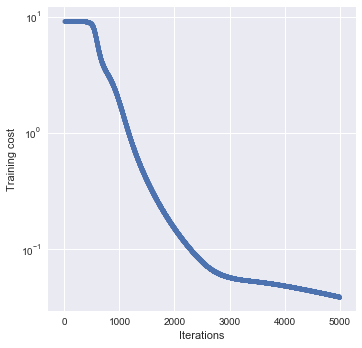

In [5]:
# Plotting the cost
estimator.plot_cost()

In [6]:
# Predicting
y_predict = estimator.predict(X)

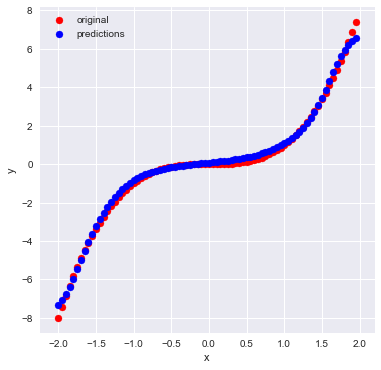

In [7]:
#  Visualisation of predictions
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.scatter(x, y, label="original", marker="o", c="r")
ax2.scatter(x, y_predict, label="predictions", marker="o", c='b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
plt.show()

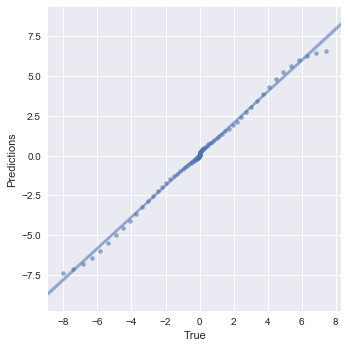

In [8]:
y_predict = np.reshape(y_predict, (y_predict.shape[0],))
estimator.correlation_plot(y_predict, y)